In [4]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,make_scorer,f1_score
from fonctions_utiles import *

In [2]:
final_df = pd.read_csv("final_df_sick_no_sick.csv")
X = final_df.drop(columns=['diagnosis'])
y = final_df.loc[:, "diagnosis"].astype(str)

In [ ]:
model_names = ["xgb","rf","lr","knn","dt"]

for model_name in model_names : 
    model = train_with_calibration(X,y)
    

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Rapport (uncalibrated):
               precision    recall  f1-score   support

          no       0.73      0.83      0.77        29
         yes       0.89      0.82      0.85        50

    accuracy                           0.82        79
   macro avg       0.81      0.82      0.81        79
weighted avg       0.83      0.82      0.82        79



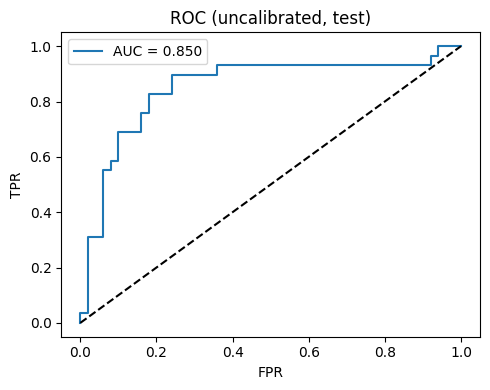

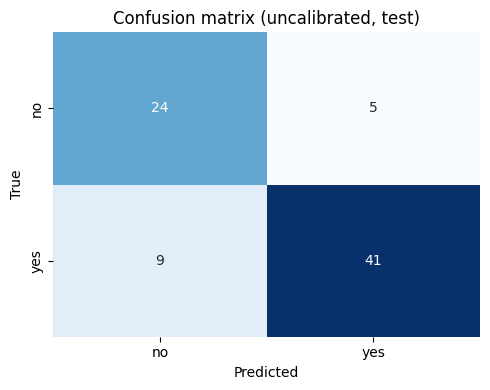

C:\Users\Marc2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


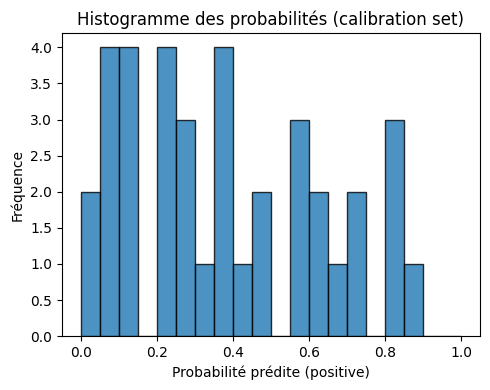

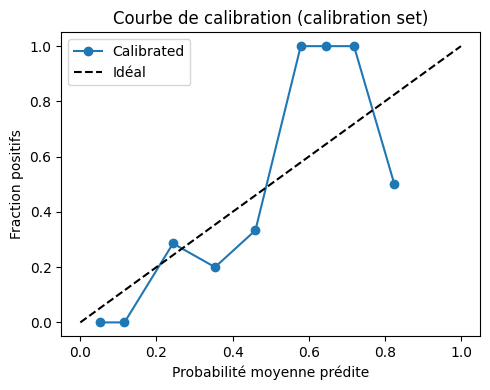

Rapport (calibrated):
               precision    recall  f1-score   support

          no       0.73      0.76      0.75        29
         yes       0.86      0.84      0.85        50

    accuracy                           0.81        79
   macro avg       0.80      0.80      0.80        79
weighted avg       0.81      0.81      0.81        79



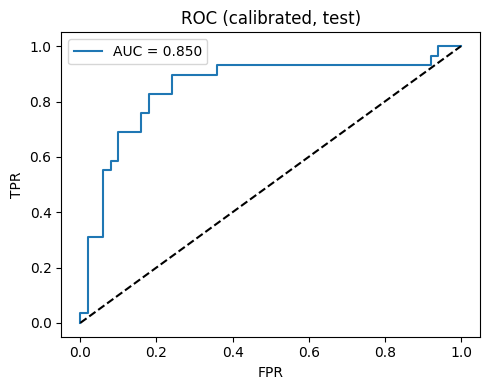

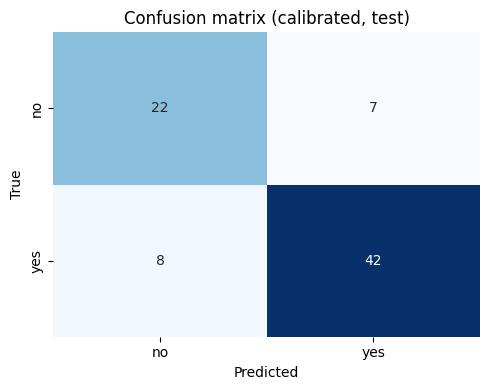

Best threshold (Youden J) sur calib: 0.4866 | J=0.6553 | TPR=0.7857 | FPR=0.1304
Rapport (calibrated + threshold):
               precision    recall  f1-score   support

          no       0.73      0.76      0.75        29
         yes       0.86      0.84      0.85        50

    accuracy                           0.81        79
   macro avg       0.80      0.80      0.80        79
weighted avg       0.81      0.81      0.81        79



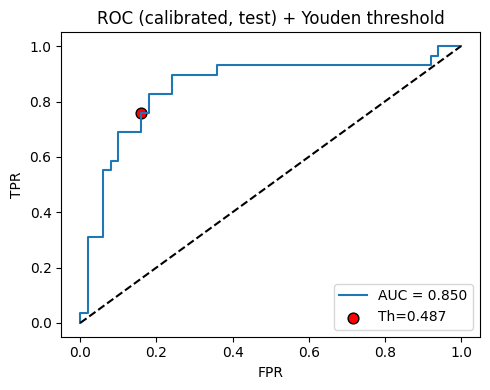

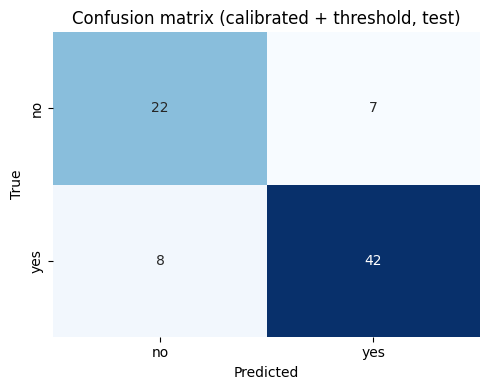

{'classes': ['no', 'yes'],
 'grid_best_params': {'clf__C': 0.001,
  'clf__class_weight': 'balanced',
  'clf__penalty': 'l2',
  'clf__solver': 'saga'},
 'grid_best_score': np.float64(0.6928042328042328),
 'best_estimator_uncalibrated': Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf',
                  LogisticRegression(C=0.001, class_weight='balanced',
                                     max_iter=5000, random_state=42,
                                     solver='saga'))]),
 'calibrated_model': CalibratedClassifierCV(cv='prefit',
                        estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                                  ('clf',
                                                   LogisticRegression(C=0.001,
                                                                      class_weight='balanced',
                                                                      max_iter=5000,
                                            

In [3]:
train_logreg_with_calibration(X,y)